## MAGMA experimnetations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings

plt.style.use("bmh")
sys.path.append("../src/")
warnings.filterwarnings("ignore")

from kernels import ExponentiatedQuadraticKernel, GaussianKernel
from magma import MAGMA

Draw a random working grid $𝐭 \subset [0,10]$ of $N = 200$ timestamps, and a number $M$ of individuals.

In [2]:
t0 = 0
tN = 10 + 1e-3
N = 200
M = 5

t = np.linspace(t0, tN, N)
print(t.shape)

(200,)


Define a prior mean function : $m0(t) = at+b$, $\forall t ∈ 𝐭$ , where $a \in [−2,2]$ and $b \in [0,10]$ are drawn uniformly.

In [3]:
a = np.random.uniform(-2, 2)
b = np.random.uniform(0, 10)

m0 = a * t + b
print(m0.shape)

(200,)


Draw hyper-parameters uniformly for $\mu_0$’s kernel : $\theta_0 = \{v_0, l_0\}$, where $v_0 \in [1, exp(5)]$ and $l_0 \in [1, exp(2)]$.

In [4]:
v0 = np.random.uniform(1, np.exp(5))
l0 = np.random.uniform(1, np.exp(2))

theta0 = np.array([v0, l0])
print(theta0)

[125.83140507   4.56763619]


Draw $\mu_0(𝐭)  \sim N (m_0(𝐭),𝐊^𝐭_{\theta_0})$.

In [5]:
K_theta_0 = ExponentiatedQuadraticKernel.compute_all(theta0, t)
print(K_theta_0.shape)

(200, 200)


In [6]:
mu_0 = np.random.multivariate_normal(m0, K_theta_0)
print(mu_0.shape)

(200,)


$\forall i \in I$, draw  $v_i \in [1, exp(5)]$, $l_i \in [1, exp(2)]$ and $\sigma^2_i \in [0, 1]$ uniformly.

In [7]:
v = np.random.uniform(1, np.exp(5), size=M)
l = np.random.uniform(1, np.exp(2), size=M)

Theta = np.c_[v, l]
Sigma = np.random.uniform(0, 1, size=M)

print(Theta)
print(Sigma)

[[62.18503334  5.84494481]
 [61.15648547  2.16935463]
 [54.71527499  7.18276916]
 [60.38935227  1.16370083]
 [51.18390255  3.23083572]]
[0.27114419 0.74338487 0.18433447 0.40081269 0.59051511]


$\forall i \in I$, draw $y_i \sim N(\mu_0(t_i), \Psi^{t_i}_{\theta_i, \sigma^2_i})$

In [8]:
Y = np.zeros((M, N))
for i in range(M):
    C_Theta = ExponentiatedQuadraticKernel.compute_all(Theta[i], t)
    Psi_Theta_Sigma = C_Theta + Sigma[i] * np.identity(N)
    Yi = np.random.multivariate_normal(mu_0, Psi_Theta_Sigma)
    Y[i] = Yi
print(Y.shape)

(5, 200)


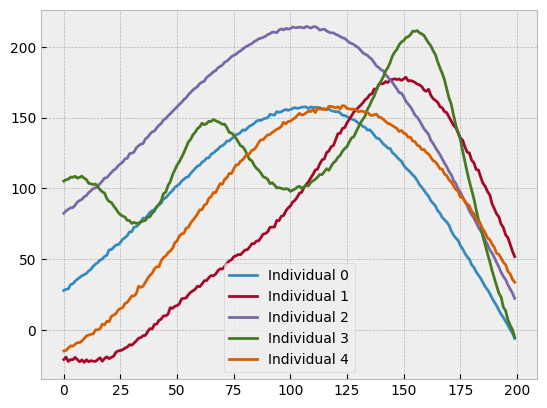

In [9]:
for i in range(M):
    plt.plot(Y[i], label=f"Individual {i}")
plt.legend()
plt.show()

### Common HP

In [10]:
Y = np.zeros((M, N))
for i in range(M):
    C_Theta = ExponentiatedQuadraticKernel.compute_all(Theta[0], t)
    Psi_Theta_Sigma = C_Theta + Sigma[0] * np.identity(N)
    Yi = np.random.multivariate_normal(mu_0, Psi_Theta_Sigma)
    Y[i] = Yi
print(Y.shape)

(5, 200)


In [11]:
model = MAGMA(
    T=None,
    Y=Y,
    common_T=t,
    m0=m0, 
    theta0=theta0, 
    Theta=Theta[0], 
    Sigma=Sigma[0],
    common_hp_flag=True,
    save_history_flag=False,
    kernel_k=ExponentiatedQuadraticKernel,
    kernel_c=ExponentiatedQuadraticKernel,
)

In [12]:
model.fit()

z.shape : (200, 1)
inv_K_theta.shape : (200, 200)


AssertionError: 